<a href="https://colab.research.google.com/github/shi5a/Data-Science-Bootcamp/blob/main/ML_Day8_AdultDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning: Assignment 4 of Week 2**


**Group members:**

Hailah Alharthi

Afrah Alharbi

Shaikha AlBilais




#**Adult Dataset Classification**


<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/HoffxyN8ghVuw/giphy.gif">
</p>

### Target = "<=50k"

### [Data Dictionary/Details](https://archive.ics.uci.edu/ml/datasets/Adult)

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- "<=50k" = >50K, <=50K (TARGET)

<center><H3>-----RULES-----</H3></center>

<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/iB4PoTVka0Xnul7UaC/giphy.gif">
</p>

### Your data has already been split into training and testing sets, do not use `train_test_split`
### Only use your training set for EDA, Cleaning, Modeling, etc.
- **You will have to perform the same transformations on your test set that you apply to your training set. The column names are exactly the same as your training set.**

### **DO NOT** look into your test set until you are ready to test the accuracy of your model. Your test set is supposed to represent unseen data and lets treat it that way until we are ready to test our accuracy. Your transformations on your training set should work on your test set since it has the exact same column names and the values are exactly the same.



# **Data Importing**

In [ ]:
import pandas as pd

In [ ]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

In [ ]:
test= test.drop("native_country", axis=1)
training= training.drop("native_country", axis=1)

In [ ]:
test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'ooccupation', 'relationship', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'target'],
      dtype='object')

In [ ]:
training.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'ooccupation', 'relationship', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'target'],
      dtype='object')

In [ ]:
# remove spaces and . in both test and training
training.target = training.target.map({" <=50K" : 1  , ' >50K': 0})
test.target = test.target.map({" <=50K." : 1  , ' >50K.': 0})

In [ ]:
#converting the "work class" values' type to float values 
training.workclass = training.workclass.map({' State-gov' : 0  , ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3,' Local-gov':4, ' ?':5, ' Self-emp-inc':6, ' Without-pay':7,' Never-worked':8})
test.workclass = test.workclass.map({' State-gov' : 0  , ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3,' Local-gov':4, ' ?':5, ' Self-emp-inc':6, ' Without-pay':7,' Never-worked':8})

In [ ]:
# Create Train
# X_train = training.drop("target", axis=1)
# y_train = training["target"]

# # Create Test
# X_test = test.drop("target", axis=1)
# y_test = test["target"]

# **Data Understanding**

In [ ]:
training.shape

(32561, 13)

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  int64 
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   ooccupation     32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  target          32561 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 3.2+ MB


In [ ]:
training.describe()

,age,workclass,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.759190
std,13.640433,1.225728,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,2.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,8.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
training['target'].value_counts()

1    24720
0     7841
Name: target, dtype: int64

In [ ]:
len(training['target'])

32561

In [ ]:
len(training['target'].loc[training['target'] =='<=50K'])

0

In [ ]:
training

,age,workclass,fnlwgt,education,education_num,marital_status,ooccupation,relationship,sex,capital_gain,capital_loss,hours_per_week,target
0,39,0,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,1
1,50,1,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,1
2,38,2,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,1
3,53,2,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,1
4,28,2,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,1
32557,40,2,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,0
32558,58,2,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,1
32559,22,2,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,1


In [ ]:
training['target'].value_counts()

1    24720
0     7841
Name: target, dtype: int64

# **Clean and Preprocess your Data**

(Hint: One-Hot-Encode Categoricals)
Another hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [ ]:
dummtrain = pd.get_dummies(data=training)
dummtrain

,age,workclass,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,ooccupation_ Other-service,ooccupation_ Priv-house-serv,ooccupation_ Prof-specialty,ooccupation_ Protective-serv,ooccupation_ Sales,ooccupation_ Tech-support,ooccupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,39,0,77516,13,2174,0,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,50,1,83311,13,0,0,13,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,38,2,215646,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,53,2,234721,7,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,28,2,338409,13,0,0,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,12,0,0,38,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
32557,40,2,154374,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
32558,58,2,151910,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
32559,22,2,201490,9,0,0,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
dummtest = pd.get_dummies(data=test)
dummtest

,age,workclass,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,ooccupation_ Other-service,ooccupation_ Priv-house-serv,ooccupation_ Prof-specialty,ooccupation_ Protective-serv,ooccupation_ Sales,ooccupation_ Tech-support,ooccupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,25,2,226802,7,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,38,2,89814,9,0,0,50,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,28,4,336951,12,0,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,44,2,160323,10,7688,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,18,5,103497,10,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,2,215419,13,0,0,36,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
16277,64,5,321403,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
16278,38,2,374983,13,0,0,50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
16279,44,2,83891,13,5455,0,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Create Train
X_train = dummtrain
y_train = training["target"]

# Create Test
X_test = dummtest
y_test = test["target"]

In [ ]:
training.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
ooccupation       0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
target            0
dtype: int64

# **Visualize the data in your training set (EDA)**
- Please only create 3 visualization explaining different insights in the data. So you have enough time to model. 
- You can only use one of each plot type, this means you cant make 3 bar plot, 3 Scatter Plots, etc.


In [ ]:
corr = training.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,workclass,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target
age,1.000000,0.082380,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.234037
workclass,0.082380,1.000000,-0.006314,0.011343,0.041172,0.012510,-0.028084,-0.047203
fnlwgt,-0.076646,-0.006314,1.000000,-0.043195,0.000432,-0.010252,-0.018768,0.009463
education_num,0.036527,0.011343,-0.043195,1.000000,0.122630,0.079923,0.148123,-0.335154
capital_gain,0.077674,0.041172,0.000432,0.122630,1.000000,-0.031615,0.078409,-0.223329
capital_loss,0.057775,0.012510,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.150526
hours_per_week,0.068756,-0.028084,-0.018768,0.148123,0.078409,0.054256,1.000000,-0.229689
target,-0.234037,-0.047203,0.009463,-0.335154,-0.223329,-0.150526,-0.229689,1.000000


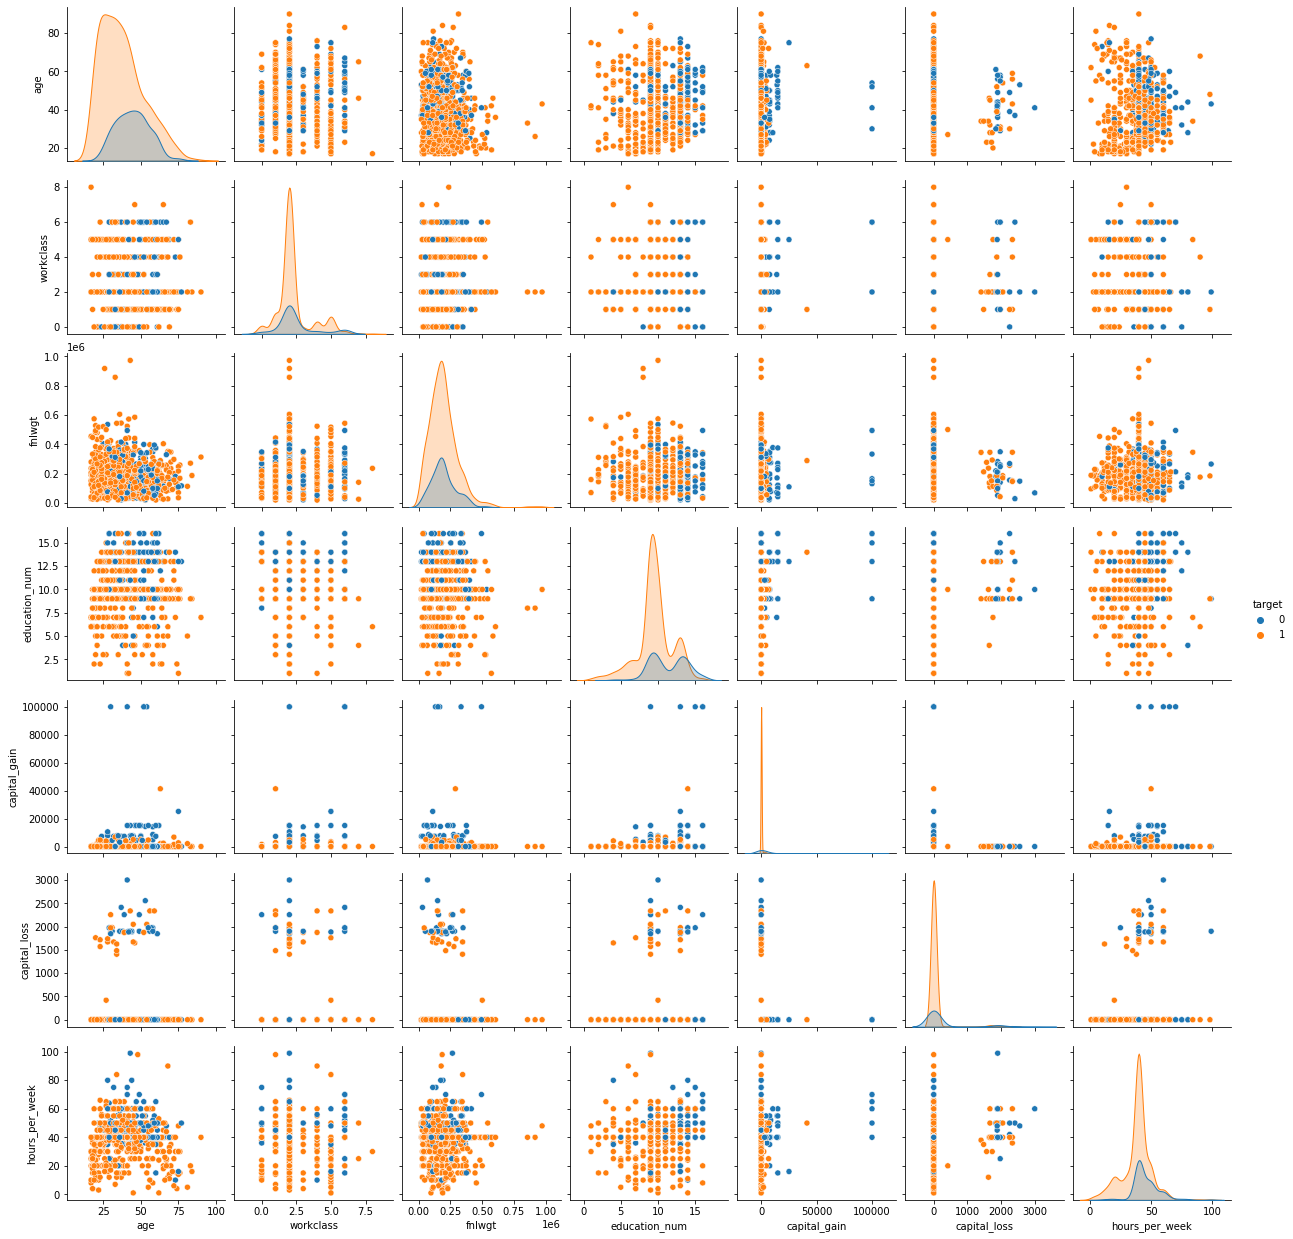

In [ ]:
import seaborn as sns
sns.pairplot(training.sample(1000), hue='target')

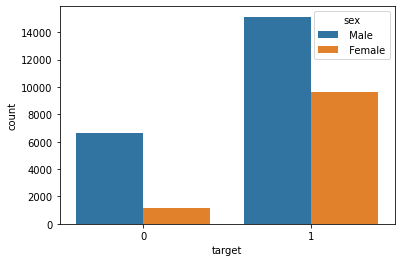

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(x='target', hue='sex', data=training)

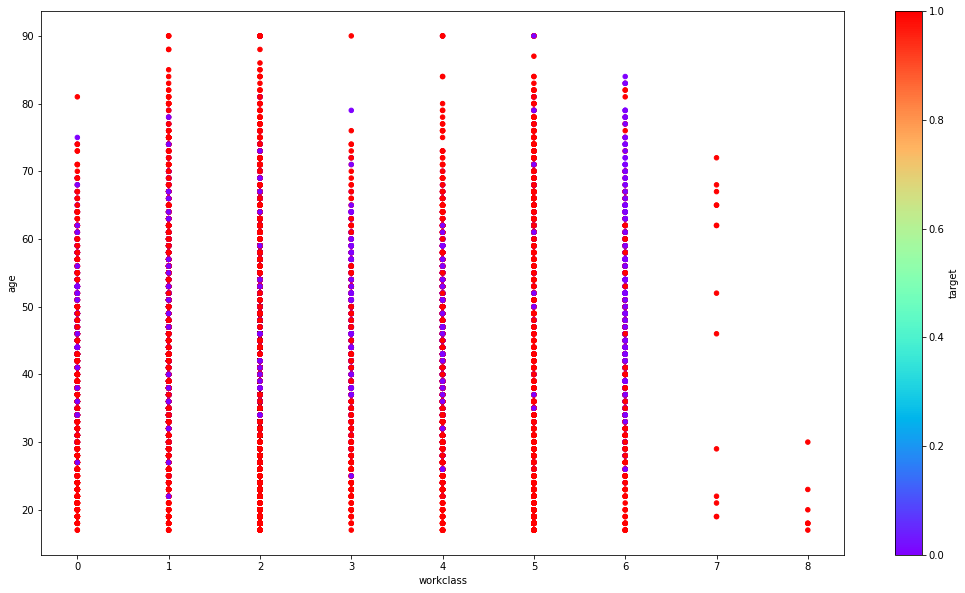

In [ ]:
#This figure is to show the distrbution of people's work class, dependes on te target
training.plot(kind='scatter', x=1, y=0,
        c='target', cmap=('rainbow'), figsize= (18, 10),sharex=False)
#in target: 1 = <=50K, 0 = >50K
#in workclass: State-gov = 0, Self-emp-not-inc = 1, Private = 2, Federal-gov = 3, Local-gov :4, ?:5, Self-emp-inc :6, Without-pay :7,Never-worked:8

#**BaseLine & KNN Models**

## **Determine your baseline model accuracy**

In [ ]:
import numpy as np
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class) # what value to predict?

baseline_model(n_predictions, baseline_value)

0        1
1        1
2        1
3        1
4        1
        ..
16276    1
16277    1
16278    1
16279    1
16280    1
Length: 16281, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
baseline_preds = baseline_model(n_predictions, baseline_value)

# score baseline model...
mean_squared_error(pd.DataFrame(y_test), baseline_preds)

0.23622627602727106

In [ ]:
from sklearn.metrics import accuracy_score
baseline_acc = accuracy_score(y_test, baseline_preds)
baseline_acc

0.7637737239727289

## **Create a kNN model** 



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
X_test

,age,workclass,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,target,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,ooccupation_ ?,ooccupation_ Adm-clerical,ooccupation_ Armed-Forces,ooccupation_ Craft-repair,ooccupation_ Exec-managerial,ooccupation_ Farming-fishing,ooccupation_ Handlers-cleaners,ooccupation_ Machine-op-inspct,ooccupation_ Other-service,ooccupation_ Priv-house-serv,ooccupation_ Prof-specialty,ooccupation_ Protective-serv,ooccupation_ Sales,ooccupation_ Tech-support,ooccupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,25,2,226802,7,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,38,2,89814,9,0,0,50,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,28,4,336951,12,0,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,44,2,160323,10,7688,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,18,5,103497,10,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,2,215419,13,0,0,36,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
16277,64,5,321403,9,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
16278,38,2,374983,13,0,0,50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
16279,44,2,83891,13,5455,0,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
perds = knn.predict(X_test)

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
knn_acc = accuracy_score(y_test, perds)
knn_acc

0.761746821448314

### **Show us your confusion matrix and explain the results**

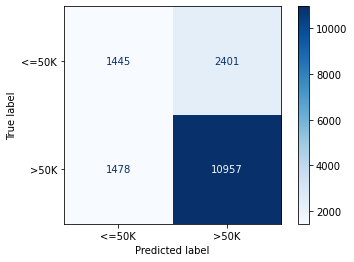

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

plot_confusion_matrix(knn, X=pd.DataFrame(X_test), y_true=y_test, cmap='Blues',display_labels=['<=50K', '>50K'], values_format='')

#in target: 1 = <=50K, 0 = >50K

TP= 1445


FP = 2401


FN = 1478


TN = 10957

## **Compare to Baseline model and explain the results**

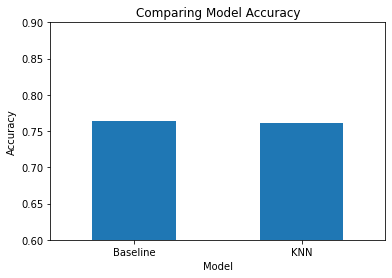

In [ ]:
pd.DataFrame([baseline_acc , knn_acc]).plot.bar()
plt.xticks(np.arange(2),('Baseline','KNN'))
plt.legend().remove()
plt.ylim(0.6, 0.9)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
plt.title('Comparing Model Accuracy');

In [ ]:
print('Baseline = ' , baseline_acc ,  ' KNN = ',knn_acc)

Baseline =  0.7637737239727289  KNN =  0.761746821448314


There is no much diffrence between the accuracy score of the two models.


But the BaseLine model's accuracy score is higher than the KNN's.

So, the KNN model is not the best one to be used.

# **BONUS ☝️**
- Create a Logistic Regression Model
- Compare results to kNN and Baseline and explain the results



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
logic_acc = accuracy_score(y_test, preds)
logic_acc

0.761746821448314

In [ ]:
print('Baseline = ' , baseline_acc ,  '\nKNN = ',knn_acc, '\nLogistic Regression=', logic_acc )

Baseline =  0.7637737239727289 
KNN =  0.761746821448314 
LogisticRegression= 0.761746821448314


**The KNN's accurecy score is equal to the Logistic Regression's.**

# **BONUS ✌️**
- Use GridSearchCV with your Logistic Regression with `cv=10` passed into your grid

In [ ]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'solver':[ "newton-cg", "lbfgs", "liblinear", "sag", "saga"],
          'max_iter': [100, 150, 200,250,500, 10000]
}

grid = GridSearchCV(lr, p_grid, cv=10)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_